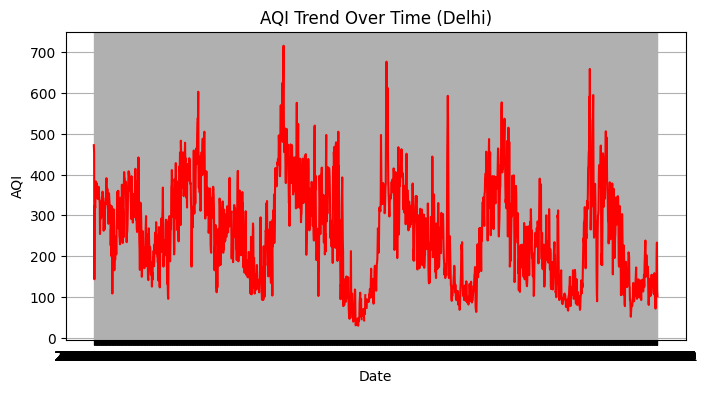

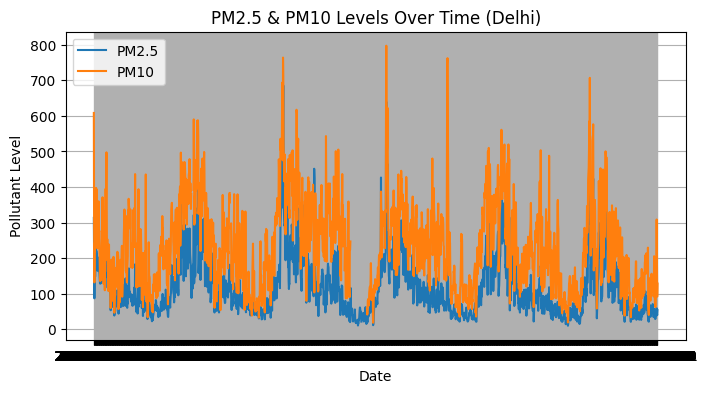

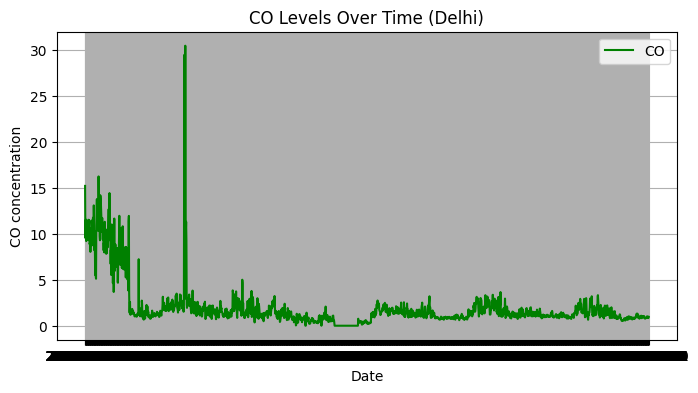

AttributeError: Can only use .dt accessor with datetimelike values

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("city_day.csv")

# 2. Select one city (example: Delhi)
city_df = df[df["City"] == "Delhi"]

3. Convert date column & handle missing values
city_df["Date"] = pd.to_datetime(city_df["Date"])
city_df = city_df.dropna(subset=["AQI"])
city_df = city_df.fillna(method="ffill")

# 4. Line plot – AQI trend over time
plt.figure(figsize=(8,4))
plt.plot(city_df["Date"], city_df["AQI"], color="red")
plt.title("AQI Trend Over Time (Delhi)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

# 5. Line plot – PM2.5 and PM10
plt.figure(figsize=(8,4))
plt.plot(city_df["Date"], city_df["PM2.5"], label="PM2.5")
plt.plot(city_df["Date"], city_df["PM10"], label="PM10")
plt.title("PM2.5 & PM10 Levels Over Time (Delhi)")
plt.xlabel("Date")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(city_df["Date"], city_df["CO"], color="green", label="CO")
plt.title("CO Levels Over Time (Delhi)")
plt.xlabel("Date")
plt.ylabel("CO concentration")
plt.legend()
plt.grid(True)
plt.show()

# 6. Bar plot – Average AQI by Month
city_df["Month"] = city_df["Date"].dt.month_name().str[:3]
monthly_avg = city_df.groupby("Month")["AQI"].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color="skyblue")
plt.title("Average Monthly AQI (Delhi)")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.grid(axis="y")
plt.show()

# 7. Scatter plot – AQI vs PM2.5
plt.figure(figsize=(6,4))
sns.scatterplot(x="PM2.5", y="AQI", data=city_df, color="purple")
plt.title("AQI vs PM2.5 (Delhi)")
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=city_df["AQI"], color="skyblue")
plt.title("Distribution of AQI Values (Delhi)")
plt.ylabel("AQI")
plt.grid(True, axis='y')
plt.show()

